In [20]:
# based on https://colindcarroll.com/2019/08/18/very-parallel-mcmc-sampling/ 

# imports

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [22]:
import sys
sys.path.append("../")

In [23]:
from tf_minimc import np_mcmc, tf_mcmc

# setup common likelihood

In [79]:
dim = 2
mu = [0, 0]
cov = [[ 1,  0.99],
       [ 0.99,  1]]
cov = np.array(cov)

# numpy version

## setup likelihood

In [80]:
# Correlated Gaussian
np_log_prob = st.multivariate_normal(np.zeros(dim), cov).logpdf

In [81]:
cov

array([[1.  , 0.99],
       [0.99, 1.  ]])

In [82]:
%%time
np_samples = np_mcmc.metropolis_hastings(np_log_prob, cov, 10000, [0,0]) 

CPU times: user 156 ms, sys: 1.73 ms, total: 157 ms
Wall time: 156 ms


# tensorflow version

## setup likelihood

In [83]:
# Initialize a single 2-variate Gaussian.
cov = np.array(cov, dtype=np.float32)
scale = tf.linalg.cholesky(cov)
print(scale)
mvn = tfd.MultivariateNormalTriL(
    loc=mu,
    scale_tril=scale)

tf_log_prob = mvn.log_prob

tf.Tensor(
[[1.         0.        ]
 [0.99       0.14106724]], shape=(2, 2), dtype=float32)


In [84]:
cov

array([[1.  , 0.99],
       [0.99, 1.  ]], dtype=float32)

In [85]:
%%time
tf_samples = tf_mcmc.tf_raw_metropolis_hastings(tf_log_prob, cov, 10000, [0,0]) 

CPU times: user 44.5 s, sys: 168 ms, total: 44.6 s
Wall time: 44.8 s


In [86]:
%%time
tf_graph_samples = tf_mcmc.tf_graph_metropolis_hastings(tf_log_prob, cov, 10000, [0,0]) 

CPU times: user 614 ms, sys: 24.6 ms, total: 639 ms
Wall time: 595 ms


In [104]:
%%time
tf_xla_samples = tf_mcmc.tf_XLA_metropolis_hastings(tf_log_prob, cov, 10000, [0,0]) 

CPU times: user 82.4 ms, sys: 1.81 ms, total: 84.2 ms
Wall time: 81.5 ms


# analyse

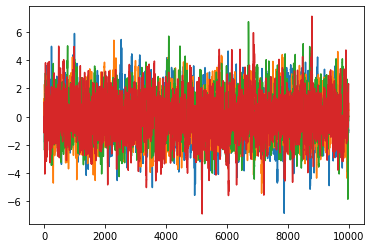

In [105]:
plt.figure()
plt.plot(np_samples[:,0])
plt.plot(tf_samples[:,0])
plt.plot(tf_graph_samples[:,0])
plt.plot(tf_xla_samples[:,0])

In [106]:
plt.figure()
plt.hist(np_samples[:,0], bins=30, histtype='step', density=True);
plt.hist(tf_samples.numpy()[:,0], bins=30, histtype='step', density=True);
plt.hist(tf_graph_samples.numpy()[:,0], bins=30, histtype='step', density=True);
plt.hist(tf_xla_samples.numpy()[:,0], bins=30, histtype='step', density=True);

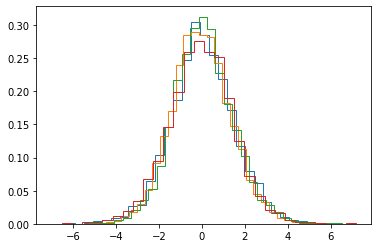

In [107]:
plt.figure()
plt.hist(np_samples[:,1], bins=30, histtype='step', density=True);
plt.hist(tf_samples.numpy()[:,1], bins=30, histtype='step', density=True);
plt.hist(tf_graph_samples.numpy()[:,1], bins=30, histtype='step', density=True);
plt.hist(tf_xla_samples.numpy()[:,1], bins=30, histtype='step', density=True);

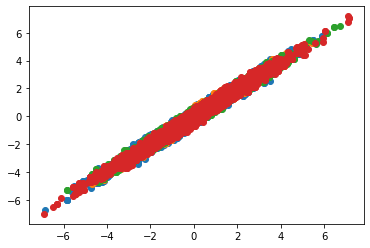

In [108]:
plt.figure()
plt.scatter(np_samples[:,0], np_samples[:,1])
plt.scatter(tf_samples.numpy()[:,0], tf_samples.numpy()[:,1])
plt.scatter(tf_graph_samples.numpy()[:,0], tf_graph_samples.numpy()[:,1])
plt.scatter(tf_xla_samples.numpy()[:,0], tf_xla_samples.numpy()[:,1])